<h1>Electrical characterization of SkyWater 130 nm<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Long-channel-nMOS-(5290-7)" data-toc-modified-id="Long-channel-nMOS-(5290-7)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Long-channel nMOS (5290-7)</a></span><ul class="toc-item"><li><span><a href="#$I_D$-$V_G$" data-toc-modified-id="$I_D$-$V_G$-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>$I_D$-$V_G$</a></span></li><li><span><a href="#$I_D$-$V_D$" data-toc-modified-id="$I_D$-$V_D$-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>$I_D$-$V_D$</a></span></li><li><span><a href="#sEKV" data-toc-modified-id="sEKV-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>sEKV</a></span></li><li><span><a href="#Notes:" data-toc-modified-id="Notes:-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Notes:</a></span></li></ul></li><li><span><a href="#Short-channel-nMOS-(5290-1)" data-toc-modified-id="Short-channel-nMOS-(5290-1)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Short-channel nMOS (5290-1)</a></span><ul class="toc-item"><li><span><a href="#$I_D$-$V_G$" data-toc-modified-id="$I_D$-$V_G$-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>$I_D$-$V_G$</a></span></li><li><span><a href="#$I_D$-$V_D$" data-toc-modified-id="$I_D$-$V_D$-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>$I_D$-$V_D$</a></span></li><li><span><a href="#sEKV" data-toc-modified-id="sEKV-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>sEKV</a></span></li><li><span><a href="#Notes:" data-toc-modified-id="Notes:-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Notes:</a></span></li></ul></li><li><span><a href="#Long-channel-pMOS-(8405-4)" data-toc-modified-id="Long-channel-pMOS-(8405-4)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Long-channel pMOS (8405-4)</a></span><ul class="toc-item"><li><span><a href="#$I_D$-$V_G$" data-toc-modified-id="$I_D$-$V_G$-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>$I_D$-$V_G$</a></span></li><li><span><a href="#$I_D$-$V_D$" data-toc-modified-id="$I_D$-$V_D$-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>$I_D$-$V_D$</a></span></li><li><span><a href="#sEKV" data-toc-modified-id="sEKV-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>sEKV</a></span></li></ul></li><li><span><a href="#Short-channel-pMOS-(8405-1)" data-toc-modified-id="Short-channel-pMOS-(8405-1)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Short-channel pMOS (8405-1)</a></span><ul class="toc-item"><li><span><a href="#$I_D$-$V_G$" data-toc-modified-id="$I_D$-$V_G$-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>$I_D$-$V_G$</a></span></li><li><span><a href="#$I_D$-$V_D$" data-toc-modified-id="$I_D$-$V_D$-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>$I_D$-$V_D$</a></span></li><li><span><a href="#sEKV" data-toc-modified-id="sEKV-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>sEKV</a></span></li></ul></li></ul></div>



The measurement was performed with the independent probe manipulators on the Cascade M150 probe station. This was a quick setup to check the opened issues, [issue#18](https://github.com/google/skywater-pdk-sky130-raw-data/issues/18) and [issue#17](https://github.com/google/skywater-pdk-sky130-raw-data/issues/17), of the Skywater 130 nm raw data repo at [link](https://github.com/google/skywater-pdk-sky130-raw-data).

The long- (0.5 $\mu$m) and short-channel (150 nm) nMOS/pMOS devices were tested.The transfer and output characteristics were carried out successfully, the current resolution is down to 10 pA level. The issues reported on the GitHub repo were not found.

In addition to the electrical characterization on the Skywater 130 test structures. The transfer characteristics are modeled by the simplified EKV (sEKV) charge-based design-oriented model. An open-source tool, [sEKV-E](https://gitlab.com/moscm/sekv-e), is used to extract the parameters for sEKV model. If sEKV-E module is not installed, you will need to do `pip install sekve`.

***

Date: 14-Oct-2022

Author: Hung-Chi Han, EPFL, Switzerland ([hung.han@epfl.ch](mailto:hung.han@epfl.ch))

Supervisor: Christian Enz, EPFL, Switzerland ([christian.enz@epfl.ch](mailto:christian.enz@epfl.ch))




In [1]:
import pandas as pd
import sekve
import matplotlib.pyplot as plt
import numpy as np
import os.path as op
import sys
sys.path.append(r"..")

In [2]:
file = r"..\docs\sky130-testtile-proprietary\sky130-testtile-pad-documentation.csv"
DF = pd.read_csv(file)
DF['Mod #'].fillna(method='ffill', inplace=True)
DF['Die Row'].fillna(method='ffill', inplace=True)
DATA_PATH = r"..\sky130_fd_pr\epfl"

In [3]:
def get_filename(code: str, mode: str, df=DF):
    mod, index = code.split("-")
    _df = get_info(code, df)
    des = _df['Description']
    des = des.replace(";", "").replace(" ", "_").replace("=", "").replace(".", "p")
    return f"sky130_fd_pr__{code}__{des}_{mode.upper()}.csv"


def get_info(code: str, df=DF):
    mod, index = code.split("-")
    _df = df[df['Mod #'] == mod]
    _df.index = [i for i in range(1, len(_df)+1)]
    ser = _df.loc[int(index)]
    return ser


def plot_idvg(lin, sat, dev_type):
    ax = plt.gca()
    axt = ax.twinx()
    if dev_type == "n":
        r = 1
        xlabel = "$V_{GS}$ (V)"
        ylabel = "$I_{D}$ (A)"
    else:
        r = -1
        xlabel = "$V_{SG}$ (V)"
        ylabel = "$-I_{D}$ (A)"
    ax.semilogy(r*lin.VG.values, r*lin.ID.values, ls="-", label="$|V_{DS}|$ = 50 mV")
    ax.semilogy(r*sat.VG.values, r*sat.ID.values, ls="--", label="$|V_{DS}|$ = 1.8 V")
    axt.plot(r*lin.VG.values, r*lin.ID.values*1e3, ls="-")
    axt.plot(r*sat.VG.values, r*sat.ID.values*1e3, ls="--")
    ax.legend(loc=2)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    axt.set_ylabel(ylabel.replace("A", "mA"))
    ax.set_ylim(1e-12, 1)
    plt.tight_layout()
    

def plot_idvd(df, dev_type, nb=181):
    ax = plt.gca()
    if dev_type == "n":
        r = 1
        xlabel = "$V_{DS}$ (V)"
        ylabel = "$I_{D}$ (mA)"
    else:
        r = -1
        xlabel = "$V_{SD}$ (V)"
        ylabel = "$-I_{D}$ (mA)"
        
    for i in range(10):
        d = df[(nb*(i-1)):(nb*i)]
        ax.plot(r*d.VD, r*d.ID*1e3)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xlim(0, 1.8)
    ax.set_ylim(0, None)
    ax.set_xticks(np.arange(0, 1.81, 0.2))
    plt.tight_layout()

# Long-channel nMOS (5290-7)

In [4]:
sample_code = '5290-7'
get_info(sample_code)

Mod #                                       5290
Group                                        NaN
New Style Name                               NaN
Old Style Name                            nshort
Description       nshort; w=0.42; l=0.5; m=1680;
Pin 01                                         b
Pin 02                                         g
Pin 03                                       NaN
Pin 04                                       NaN
Pin 05                                       NaN
Pin 06                                       NaN
Pin 07                                       NaN
Pin 08                                       NaN
Pin 09                                         d
Pin 10                                       NaN
Pin 11                                       NaN
Pin 12                                       NaN
Die Row                                      3.0
Name: 7, dtype: object

## $I_D$-$V_G$

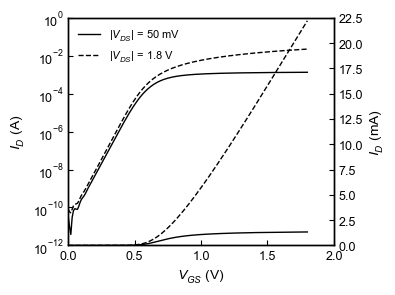

In [5]:
file_name = get_filename(sample_code, 'idvg')
file_path = op.join(DATA_PATH, 'nfet_01v8', file_name)
df = pd.read_csv(file_path, engine='python', index_col=0)
idvg_sat = df[df['VD'] == 1.8]
idvg_lin = df[df['VD'] == 0.05]
plot_idvg(idvg_lin, idvg_sat, "n")

## $I_D$-$V_D$

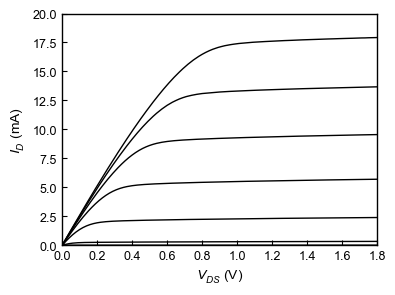

In [6]:
file_name = get_filename(sample_code, 'idvd')
file_path = op.join(DATA_PATH, 'nfet_01v8', file_name)
df = pd.read_csv(file_path)
plot_idvd(df, "n")

## sEKV

In [7]:
%%capture
res = sekve.Extractor(vg=idvg_sat[idvg_sat.ID > 1E-10].VG.values,
                      i=idvg_sat[idvg_sat.ID > 1E-10].ID.values,
                      vd=1.8, force_lambdac_0=False)
res.run_extraction();

The figures below show each extraction step.

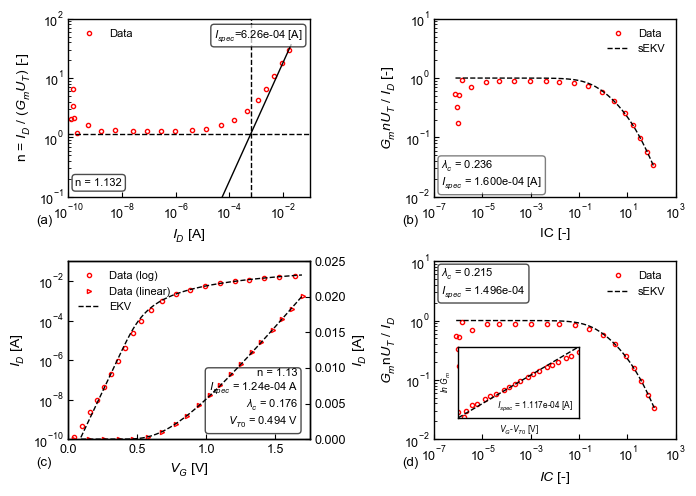

In [8]:
res.progress_fig

The figure below shows the comparison between the measurement and the simplified EKV model

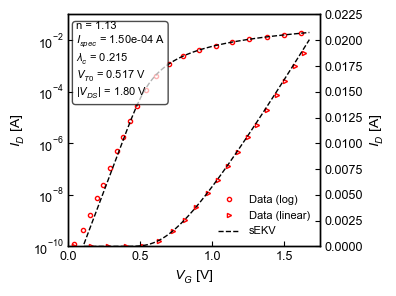

In [9]:
res.final_fig

The figure below shows the transconductance efficiency versus drain current, where the simplified EKV model is compared to the experimental data.

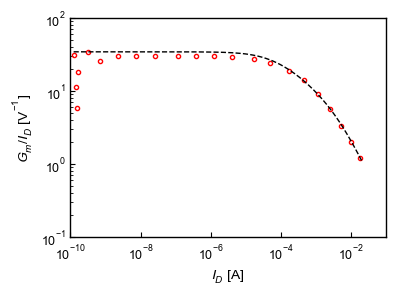

In [10]:
Gm_over_ID = np.gradient(np.log(idvg_sat.ID), idvg_sat.VG)
ax = plt.gca()

ax.loglog(idvg_sat.ID, Gm_over_ID, marker='o', color='r', ls='')
ax.loglog(res.IC*res.Ispec, res.get_sim_gms_over_IC()/(res.n*res.Ut), ls='--')

ax.set_xlabel("$I_D$ [A]")
ax.set_ylabel("$G_m/I_D$ [V$^{-1}$]")
ax.set_xlim(1e-10, 1e-1);

## Notes:
- The measured DUT 
    - either be a short-channel device due to the high $\lambda_c$. It means that there might be a mistake in the [documentation](https://github.com/google/skywater-pdk-sky130-raw-data/blob/main/docs/sky130-testtile-proprietary/sky130-testtile-pad-documentation.ods).
    - or be a long device. The reason having a large $\lambda_c$ is due to the mobility reduction by the vertical field. The 1.8 V gate voltage was too high for this device since the threshold voltage is 0.5 V. Also, the DIBL effect is small, this suggests that the DUT could be a long-channel transistor. 


# Short-channel nMOS (5290-1)

In [11]:
sample_code = '5290-1'
get_info(sample_code)

Mod #                                        5290
Group                                         NaN
New Style Name                                NaN
Old Style Name                             nshort
Description       nshort; w=0.36; l=0.15; m=2280;
Pin 01                                          b
Pin 02                                          g
Pin 03                                          d
Pin 04                                        NaN
Pin 05                                        NaN
Pin 06                                        NaN
Pin 07                                        NaN
Pin 08                                        NaN
Pin 09                                        NaN
Pin 10                                        NaN
Pin 11                                        NaN
Pin 12                                        NaN
Die Row                                       3.0
Name: 1, dtype: object

## $I_D$-$V_G$

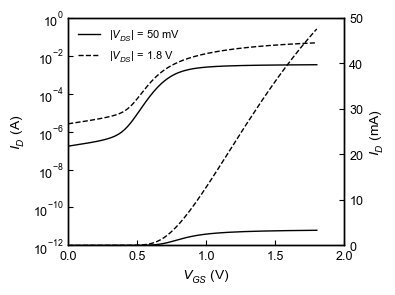

In [12]:
file_name = get_filename(sample_code, 'idvg')
file_path = op.join(DATA_PATH, 'nfet_01v8', file_name)
df = pd.read_csv(file_path)
idvg_sat = df[df['VD'] == 1.8]
idvg_lin = df[df['VD'] == 0.05]
plot_idvg(idvg_lin, idvg_sat, "n")

## $I_D$-$V_D$

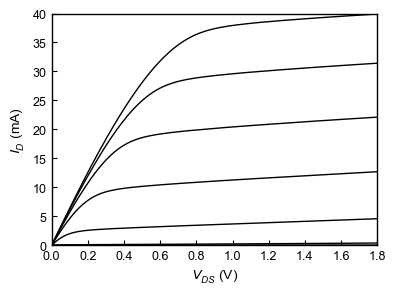

In [13]:
file_name = get_filename(sample_code, 'idvd')
file_path = op.join(DATA_PATH, 'nfet_01v8', file_name)
df = pd.read_csv(file_path)
plot_idvd(df, "n")

## sEKV

In [14]:
%%capture
res = sekve.Extractor(vg=idvg_sat[idvg_sat.ID > 1E-5].VG.values,
                      i=idvg_sat[idvg_sat.ID > 1E-5].ID.values,
                      vd=1.8, force_lambdac_0=False)
res.run_extraction();

The figures below show each extraction step.

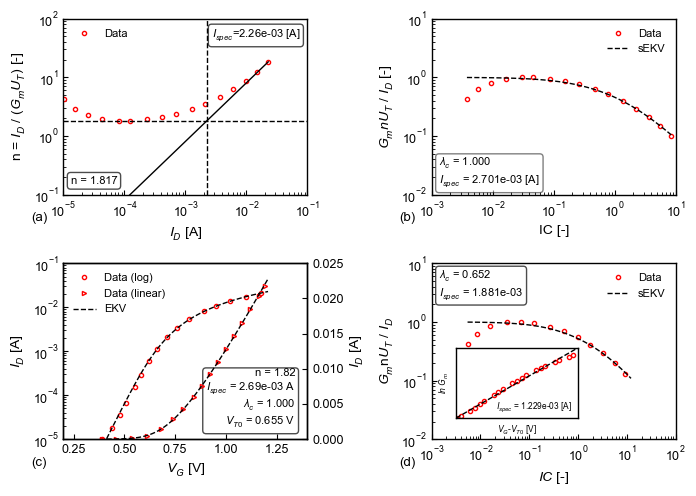

In [15]:
res.progress_fig

The figure below shows the comparison between the measurement and the simplified EKV model

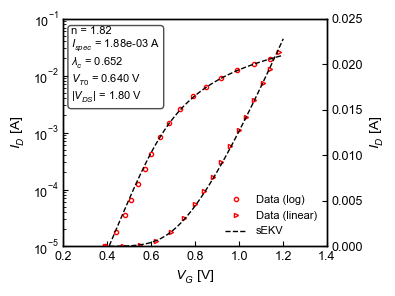

In [16]:
res.final_fig

The figure below shows the transconductance efficiency versus drain current, where the simplified EKV model is compared to the experimental data.

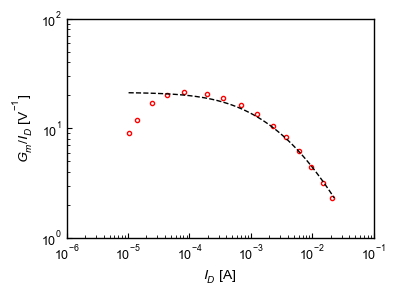

In [17]:
Gm_over_ID = np.gradient(np.log(res.ID), res.VG)
ax = plt.gca()

ax.loglog(res.ID, Gm_over_ID, marker='o', color='r', ls='')
ax.loglog(res.IC*res.Ispec, res.get_sim_gms_over_IC()/(res.n*res.Ut), ls='--')

ax.set_xlabel("$I_D$ [A]")
ax.set_ylabel("$G_m/I_D$ [V$^{-1}$]");
ax.set_xlim(1e-6, 1e-1);

## Notes:
- The measured DUT behaves unusually due to the high $I_{off}$. However, due to the common source and common bulk configuration, we can not figure out the reason. Also, this unexpectedly high $I_{off}$ might be due to the a leakage current flowing through the common source/bulk configuration.

# Long-channel pMOS (8405-4)

In [18]:
sample_code = '8405-4'
get_info(sample_code)

Mod #                                                          8405
Group                                                           NaN
New Style Name                                                  NaN
Old Style Name                                                  NaN
Description       pshort; w=1.0; l=0.5; m=1;sa=2.5;sb=2.5;prox_c...
Pin 01                                                            b
Pin 02                                                            g
Pin 03                                                          NaN
Pin 04                                                          NaN
Pin 05                                                          NaN
Pin 06                                                            d
Pin 07                                                            s
Pin 08                                                          NaN
Pin 09                                                          NaN
Pin 10                                          

## $I_D$-$V_G$

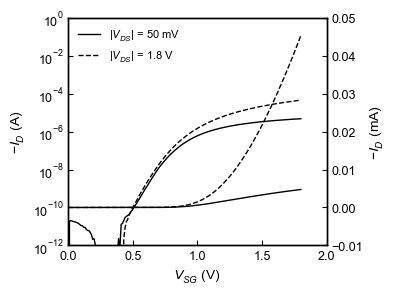

In [19]:
file_name = get_filename(sample_code, 'idvg')
file_path = op.join(DATA_PATH, 'pfet_01v8', file_name)
df = pd.read_csv(file_path)
idvg_sat = df[df['VD'] == -1.8]
idvg_lin = df[df['VD'] == -0.05]
plot_idvg(idvg_lin, idvg_sat, "p")

## $I_D$-$V_D$

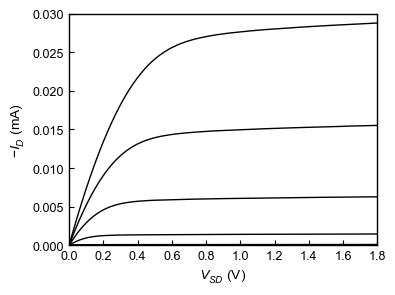

In [20]:
file_name = get_filename(sample_code, 'idvd')
file_path = op.join(DATA_PATH, 'pfet_01v8', file_name)
df = pd.read_csv(file_path)
plot_idvd(df, "p")

## sEKV

In [21]:
%%capture
res = sekve.Extractor(vg=-idvg_sat[idvg_sat.ID < -1E-10].VG.values,
                      i=-idvg_sat[idvg_sat.ID < -1E-10].ID.values, vd=-1.8, force_lambdac_0=True)
res.run_extraction()

The figures below show each extraction step.

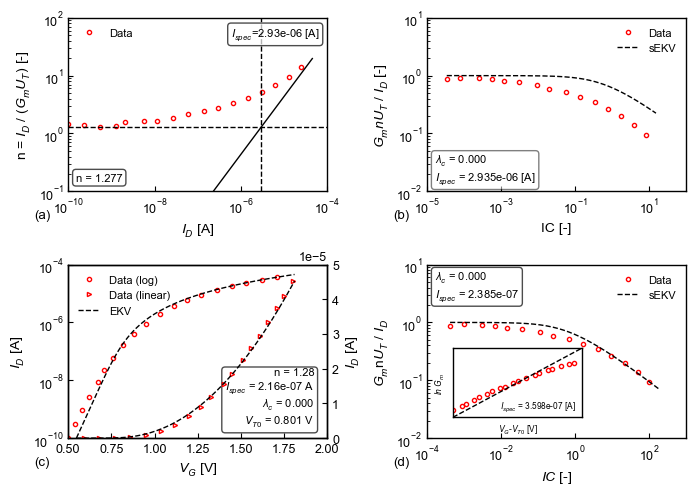

In [22]:
res.progress_fig

The figure below shows the comparison between the measurement and the simplified EKV model

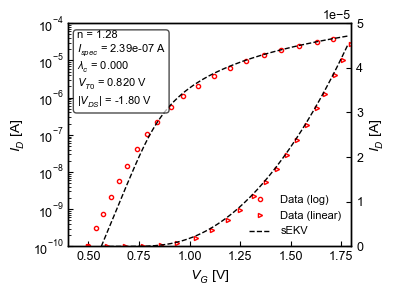

In [23]:
res.final_fig

The figure below shows the transconductance efficiency versus drain current, where the simplified EKV model is compared to the experimental data.

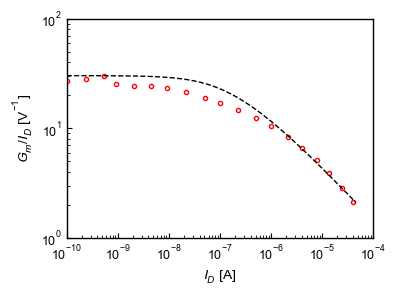

In [24]:
Gm_over_ID = np.gradient(np.log(res.ID), res.VG)
ax = plt.gca()

ax.loglog(res.ID, Gm_over_ID, marker='o', color='r', ls='')
ax.loglog(res.IC*res.Ispec, res.get_sim_gms_over_IC()/(res.n*res.Ut), ls='--')

ax.set_xlabel("$I_D$ [A]")
ax.set_ylabel("$G_m/I_D$ [V$^{-1}$]");

# Short-channel pMOS (8405-1)

In [25]:
sample_code = '8405-1'
get_info(sample_code)

Mod #                                                          8405
Group                                                           NaN
New Style Name                                                  NaN
Old Style Name                                                  NaN
Description       pshort; w=7.0; l=0.15; m=1;sa=0.48;sb=0.48;pro...
Pin 01                                                            b
Pin 02                                                            g
Pin 03                                                            d
Pin 04                                                            s
Pin 05                                                          NaN
Pin 06                                                          NaN
Pin 07                                                          NaN
Pin 08                                                          NaN
Pin 09                                                          NaN
Pin 10                                          

## $I_D$-$V_G$

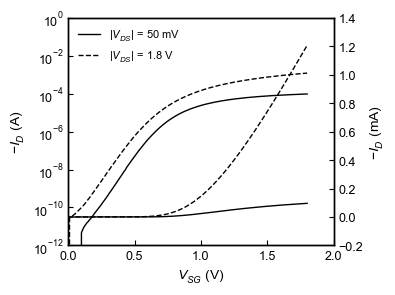

In [26]:
file_name = get_filename(sample_code, 'idvg')
file_path = op.join(DATA_PATH, 'pfet_01v8', file_name)
df = pd.read_csv(file_path)
idvg_sat = df[df['VD'] == -1.8]
idvg_lin = df[df['VD'] == -0.05]
plot_idvg(idvg_lin, idvg_sat, "p")

## $I_D$-$V_D$

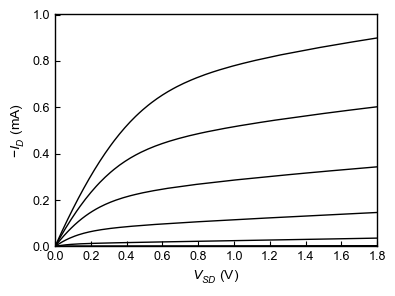

In [27]:
file_name = get_filename(sample_code, 'idvd')
file_path = op.join(DATA_PATH, 'pfet_01v8', file_name)
df = pd.read_csv(file_path)
plot_idvd(df, "p")

## sEKV

In [28]:
%%capture
res = sekve.Extractor(vg=-idvg_sat[idvg_sat.ID < -1E-10].VG.values,
                      i=-idvg_sat[idvg_sat.ID < -1E-10].ID.values, vd=-1.8, force_lambdac_0=False)
res.run_extraction()

The figures below show each extraction step.

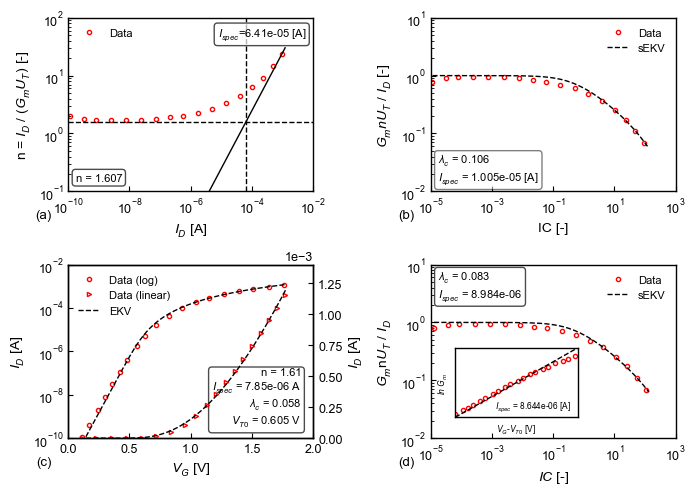

In [29]:
res.progress_fig

The figure below shows the comparison between the measurement and the simplified EKV model

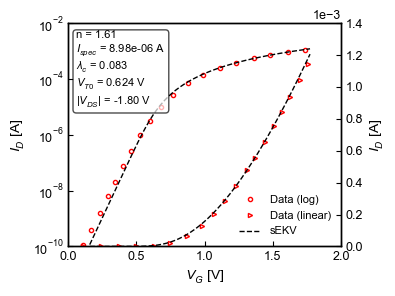

In [30]:
res.final_fig

The figure below shows the transconductance efficiency versus drain current, where the simplified EKV model is compared to the experimental data.

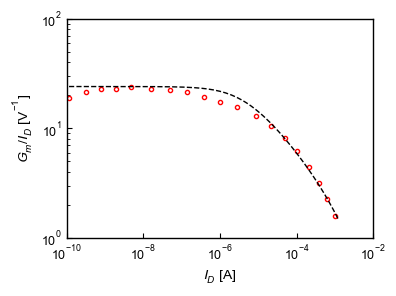

In [31]:
Gm_over_ID = np.gradient(np.log(res.ID), res.VG)
ax = plt.gca()

ax.loglog(res.ID, Gm_over_ID, marker='o', color='r', ls='')
ax.loglog(res.IC*res.Ispec, res.get_sim_gms_over_IC()/(res.n*res.Ut), ls='--')

ax.set_xlabel("$I_D$ [A]")
ax.set_ylabel("$G_m/I_D$ [V$^{-1}$]");